In [3]:
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import datetime
import tilemapbase as tmb

from pluma.schema.dataset import Dataset

%matplotlib inline
plt.style.use('ggplot')


ModuleNotFoundError: No module named 'EmotionalCities'

In [2]:
stream_root_folder = r"C:\Users\neurogears\Desktop\EC_datasets\FMUL2022_10_21_11_20_53"
dataset = Dataset(stream_root_folder, datasetlabel='FMUL2022_10_21_11_20_53')

#dataset.populate_streams(autoload = True)
#dataset.export_streams()
dataset.import_streams()



In [9]:
dataset.georeference

,Message,Identity,Class,Id,Length,Lat,Lon,Height,Time_iTow
Seconds,,,,,,,,,
1904-01-01 23:18:16.239324129,"<UBX(NAV-HPPOSLLH, version=0, reserved0=0, inv...",NAV-HPPOSLLH,NAV,HPPOSLLH,36,38.746326,-9.161714,161701.6,469143000
1904-01-01 23:18:17.239320941,"<UBX(NAV-HPPOSLLH, version=0, reserved0=0, inv...",NAV-HPPOSLLH,NAV,HPPOSLLH,36,38.746326,-9.161714,161461.2,469144000
1904-01-01 23:18:18.239317753,"<UBX(NAV-HPPOSLLH, version=0, reserved0=0, inv...",NAV-HPPOSLLH,NAV,HPPOSLLH,36,38.746326,-9.161713,161410.8,469145000
1904-01-01 23:18:19.239314565,"<UBX(NAV-HPPOSLLH, version=0, reserved0=0, inv...",NAV-HPPOSLLH,NAV,HPPOSLLH,36,38.746325,-9.161712,161337.7,469146000
1904-01-01 23:18:20.239311377,"<UBX(NAV-HPPOSLLH, version=0, reserved0=0, inv...",NAV-HPPOSLLH,NAV,HPPOSLLH,36,38.746325,-9.161712,161433.3,469147000
...,...,...,...,...,...,...,...,...,...
1904-01-01 23:39:54.235186223,"<UBX(NAV-HPPOSLLH, version=0, reserved0=0, inv...",NAV-HPPOSLLH,NAV,HPPOSLLH,36,38.746331,-9.161667,155415.2,470441000
1904-01-01 23:39:55.235183035,"<UBX(NAV-HPPOSLLH, version=0, reserved0=0, inv...",NAV-HPPOSLLH,NAV,HPPOSLLH,36,38.746332,-9.161668,155323.2,470442000
1904-01-01 23:39:56.235179847,"<UBX(NAV-HPPOSLLH, version=0, reserved0=0, inv...",NAV-HPPOSLLH,NAV,HPPOSLLH,36,38.746332,-9.161668,155290.4,470443000


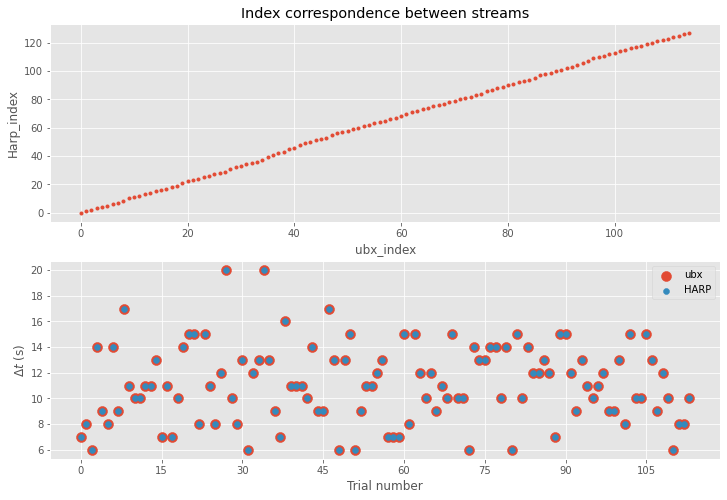

In [8]:
drift_correction_model = dataset.calibrate_ubx_to_harp(plot_diagnosis=True)
dataset.add_ubx_georeference(event = "NAV-HPPOSLLH", calibrate_clock = True)


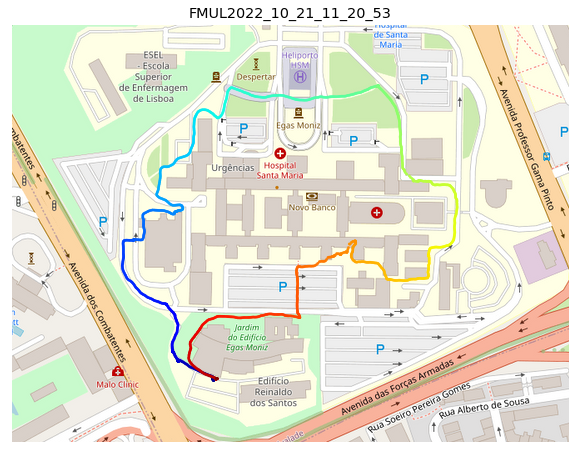

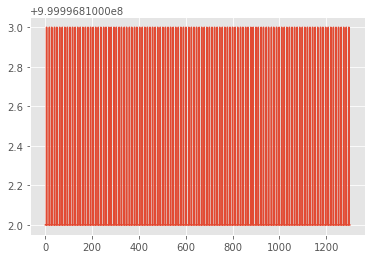

In [13]:
tiles = tmb.tiles.Stamen_Watercolour
fig = dataset.showmap(colorscale_override=dataset.georeference.index,
                      cmap = "jet",
                      markersize= 5, figsize = (10,10),
                      )
plt.title(dataset.datasetlabel)
plt.show()


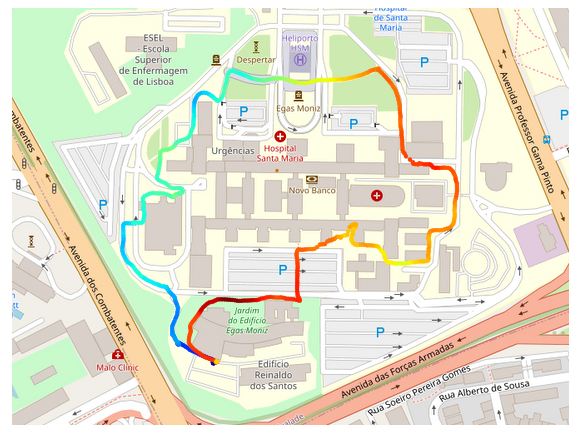

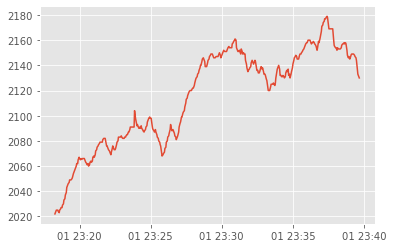

In [11]:
from EmotionalCities.Processing.resampling import resample_temporospatial
from EmotionalCities.Visualization.maps import showmap

resampled = resample_temporospatial(dataset.streams.TK.AirQuality.Temperature.data,
                                    dataset.georeference)

fig = showmap(resampled, figsize=(10,10))
plt.show()
plt.figure
plt.plot(resampled.Data)
plt.show()


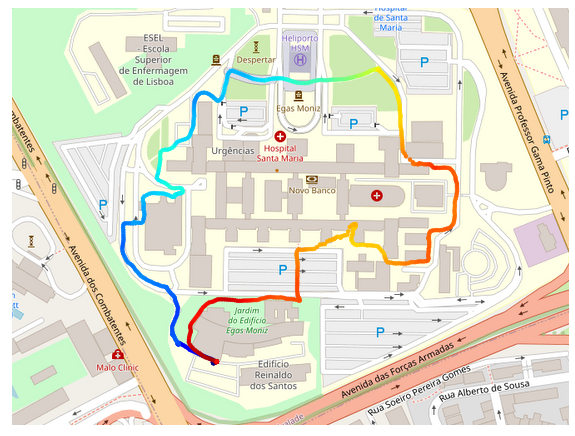

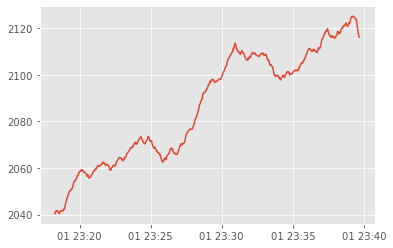

In [14]:
from EmotionalCities.Processing.resampling import resample_temporospatial
from EmotionalCities.Visualization.maps import showmap

resampled = resample_temporospatial(dataset.streams.TK.PTC.AirTemp.data,
                                    dataset.georeference)

fig = showmap(resampled, figsize=(10,10))
plt.show()
plt.figure
plt.plot(resampled.Data)
plt.show()

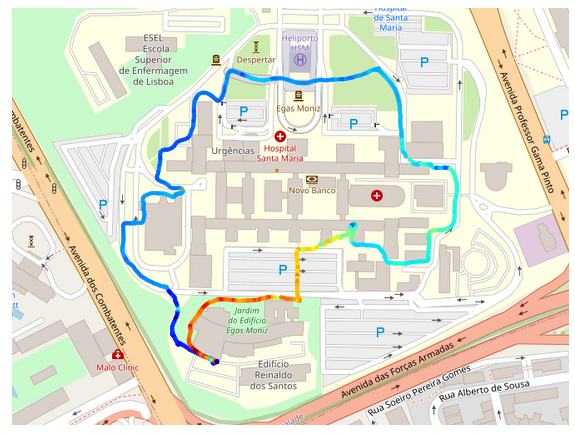

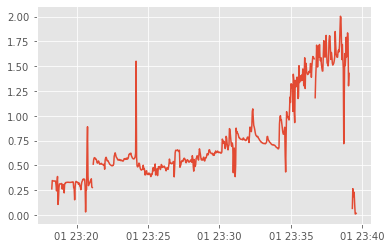

In [17]:
resampled = resample_temporospatial(dataset.streams.Empatica.data.E4_Gsr["Value"], dataset.georeference)

fig = showmap(resampled, figsize=(10,10))
plt.show()
plt.figure
plt.plot(resampled.Data)
plt.show()


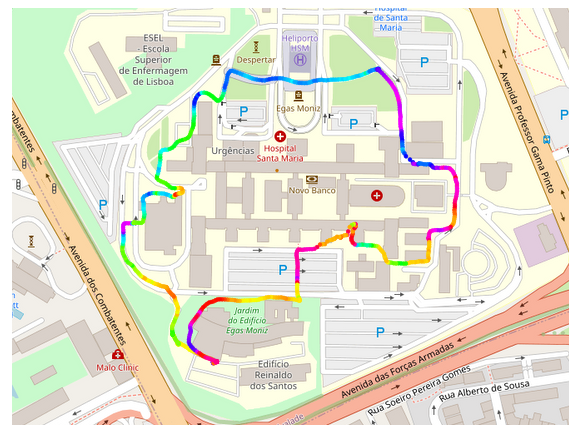

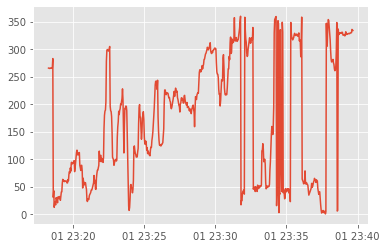

In [18]:
from EmotionalCities.Processing.resampling import resample_temporospatial_circ
resampled = resample_temporospatial_circ(dataset.streams.Accelerometer.data['Orientation.X'],
                                         dataset.georeference)

fig = showmap(resampled, figsize=(10,10), cmap = 'hsv')
plt.show()
plt.figure
plt.plot(resampled.Data)
plt.show()


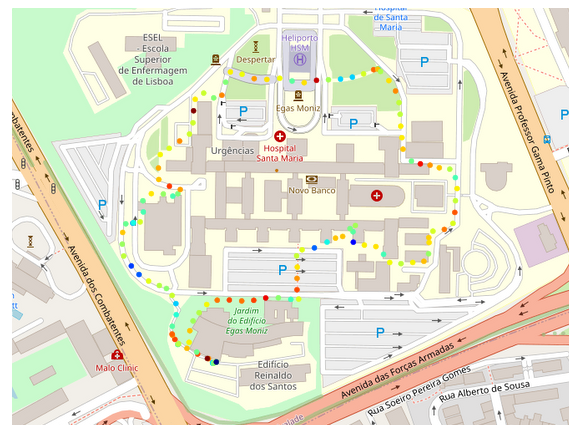

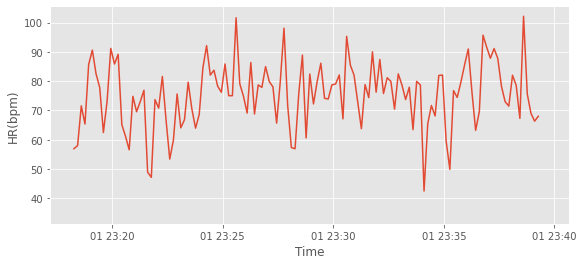

In [10]:
from EmotionalCities.Processing.ecg import heartrate_from_ecg

hr,_ = heartrate_from_ecg(dataset.streams.BioData.ECG,
                                         fs = 250, max_heartrate_bpm = 250.0,
                                        peak_height = 800, smooth_win = 10)

resampled = resample_temporospatial(hr, dataset.georeference,
                                           sampling_dt = datetime.timedelta(seconds = 10))
fig = showmap(resampled, figsize=(10,10), cmap = 'jet', markersize = 25 )
plt.show()
plt.figure(figsize= (9.3,4))
plt.plot(resampled.Data)
plt.xlabel('Time')
plt.ylabel('HR(bpm)')
plt.show()

In [11]:
#dataset.streams.TK.AmbientLight.AmbientLight.load()
dataset.streams.TK.AmbientLight.AmbientLight.plot(color = "cyan")
plt.legend()

ValueError: Input dataframe is empty.

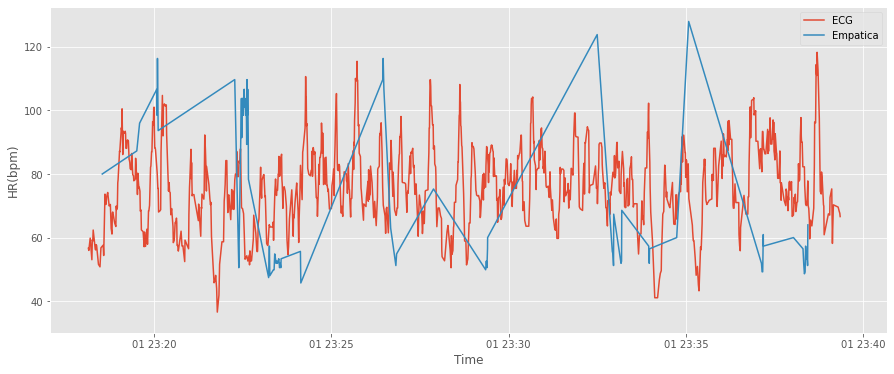

In [16]:
plt.figure(figsize=(15,6))
plt.plot(hr, label = 'ECG')
plt.plot(dataset.streams.Empatica.data.E4_Hr['Value'], label = 'Empatica')
plt.xlabel("Time")
plt.ylabel("HR(bpm)")
plt.legend()
plt.show()